# 1. Exploratory Data Analysis

<div style="background-color:#FFF5E6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 6px 0 rgba(0, 0, 0, 0.1); border: 2px solid #FFDAB9; margin-top: 20px;">
    <h1 style="font-size:30px; font-family:'Playfair Display', serif; color:#2A5D84; text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.2);">
        Dataset Overview
    </h1>
    <p style="font-size:18px; font-family:'Roboto', sans-serif; line-height: 1.6em; text-indent: 20px; color:#4A4A4A;">
        The dataset includes the following columns:
    </p>
    <ul style="font-size:15px; font-family:'Roboto', sans-serif; line-height: 1.6em; color:#4A4A4A; padding-left: 40px;">
        <li><b>City:</b> The name of the city where the air quality measurement was taken.</li>
        <li><b>Country:</b> The country in which the city is located.</li>
        <li><b>Date:</b> The date when the measurement was recorded.</li>
        <li><b>PM2.5:</b> The concentration of fine particulate matter with a diameter of less than 2.5 micrometers (µg/m³).</li>
        <li><b>PM10:</b> The concentration of particulate matter with a diameter of less than 10 micrometers (µg/m³).</li>
        <li><b>NO2:</b> The concentration of nitrogen dioxide (µg/m³).</li>
        <li><b>SO2:</b> The concentration of sulfur dioxide (µg/m³).</li>
        <li><b>CO:</b> The concentration of carbon monoxide (mg/m³).</li>
        <li><b>O3:</b> The concentration of ozone (µg/m³).</li>
        <li><b>Temperature:</b> The temperature at the time of measurement (°C).</li>
        <li><b>Humidity:</b> The humidity level at the time of measurement (%).</li>
        <li><b>Wind Speed:</b> The wind speed at the time of measurement (m/s).</li>
    </ul>
</div>


### Import libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

### Read dataset

In [2]:
df = pd.read_csv('../data/global_air_quality_data_10000.csv')

### Shape of dataset

In [9]:
print(f"Number of rows: {df.shape[0]}.\nNumber of columns: {df.shape[1]}.")

Number of rows: 10000.
Number of columns: 12.


### Sample data

In [10]:
df.head(5)

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


Each row contains information about the city, country, date, and air quality indices such as PM2.5, PM10, NO2, SO2, CO, O3, along with information on temperature, humidity, and wind speed at the time of measurement.

### Check missing value and data type

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         10000 non-null  object 
 1   Country      10000 non-null  object 
 2   Date         10000 non-null  object 
 3   PM2.5        10000 non-null  float64
 4   PM10         10000 non-null  float64
 5   NO2          10000 non-null  float64
 6   SO2          10000 non-null  float64
 7   CO           10000 non-null  float64
 8   O3           10000 non-null  float64
 9   Temperature  10000 non-null  float64
 10  Humidity     10000 non-null  float64
 11  Wind Speed   10000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 937.6+ KB


The data types are already appropriate, so no processing is needed.

### Check duplicated

In [13]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


Because the number of duplicate rows is 0, so no handling is needed.

### Basic statistics of dataset

In [14]:
df.describe()

,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,77.448439,104.438161,52.198649,25.344490,5.047984,106.031643,14.89715,55.078579,10.231636
std,41.927871,55.062396,27.320490,14.091194,2.852625,55.081345,14.44380,25.982232,5.632628
min,5.020000,10.000000,5.010000,1.000000,0.100000,10.040000,-10.00000,10.010000,0.500000
25%,41.185000,57.137500,28.347500,13.190000,2.560000,58.380000,2.25750,32.527500,5.290000
50%,77.725000,103.690000,52.100000,25.350000,5.090000,106.055000,14.75500,55.080000,10.260000
75%,113.392500,152.265000,75.705000,37.500000,7.480000,153.982500,27.38250,77.442500,15.070000
max,149.980000,200.000000,100.000000,49.990000,10.000000,200.000000,40.00000,99.990000,20.000000


**Analysis of Global Air Quality Dataset:**
1. Sample Size and Coverage:
- The dataset contains 10,000 records (count = 10000) across 9 key air quality and meteorological parameters
- This provides a robust sample size for statistical analysis
2. Air Pollutants Analysis:
- PM2.5: Mean concentration of 77.45 μg/m³, which is significantly higher than WHO guidelines
- PM10: Average of 104.44 μg/m³, showing considerable particulate matter pollution
- NO2: Mean value of 52.20 μg/m³, indicating moderate nitrogen dioxide levels
- SO2: Average of 25.34 μg/m³, suggesting moderate sulfur dioxide pollution
- CO: Relatively low mean concentration of 5.05 units
- O3: Mean ozone level of 106.03 units, showing significant presence
3. Data Distribution:
- All pollutants show considerable spread between minimum and maximum values
- Notable standard deviations, particularly in PM10 (55.06) and O3 (55.08)
- The data appears to be right-skewed for most pollutants, as median values are generally lower than means
4. Weather Parameters:
- Temperature: Ranges from -10°C to 40°C, with a mean of 14.90°C
- Humidity: Average of 55.08%, ranging from 10.01% to 99.99%
- Wind Speed: Mean of 10.23 units, ranging from 0.5 to 20 units

<div style="background-color:#FFF5E6; padding: 10px; border-radius: 10px; box-shadow: 0 2px 2px rgba(0, 0, 0, 0.1); border: 5px solid #C2C2E8; margin-top: 5px;">
    <h1 style="font-size:28px; font-family:'Playfair Display', serif; color:#2A5D84; text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.2);">
        Univariate Analysis
    </h1>
</div>

### Numerical Columns

#### Histograms

In [38]:
numerical_cols = df.select_dtypes(include='number').columns

def numerical_histograms(cols_to_analyze):
    for col in cols_to_analyze:

        print(f'\nColumn: {col}')
        print(f'Min: {df[col].min()}, Max: {df[col].max()}')
        missing_percentage = df[col].isnull().mean() * 100
        print(f'Missing values: {missing_percentage:.2f}%')

        fig = go.Figure()
        
        fig.add_trace(go.Histogram(
            x=df[col],
            name=col,
            opacity=0.75,
            histnorm='density',
            marker=dict(color='lightblue', line=dict(width=0.5)),
        ))
        
        fig.update_layout(
            title=f'Distribution of {col}',
            xaxis_title='Value',
            yaxis_title='Density',
            barmode='overlay',
            bargap=0.1,
            template='plotly_white'
        )

        fig.show()

numerical_histograms(cols_to_analyze=numerical_cols)


Column: PM2.5
Min: 5.02, Max: 149.98
Missing values: 0.00%



Column: PM10
Min: 10.0, Max: 200.0
Missing values: 0.00%



Column: NO2
Min: 5.01, Max: 100.0
Missing values: 0.00%



Column: SO2
Min: 1.0, Max: 49.99
Missing values: 0.00%



Column: CO
Min: 0.1, Max: 10.0
Missing values: 0.00%



Column: O3
Min: 10.04, Max: 200.0
Missing values: 0.00%



Column: Temperature
Min: -10.0, Max: 40.0
Missing values: 0.00%



Column: Humidity
Min: 10.01, Max: 99.99
Missing values: 0.00%



Column: Wind Speed
Min: 0.5, Max: 20.0
Missing values: 0.00%


#### Box plots

In [50]:
numerical_cols = df.select_dtypes(include='number').columns

def numerical_boxplot(cols_to_analyze):
    fig = go.Figure()
    
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'orange', 'lightskyblue', 'lightseagreen', 'lightgoldenrodyellow', 'lightgray', 'lightcyan']
    
    for i, col in enumerate(cols_to_analyze):
        fig.add_trace(go.Box(
            y=df[col],
            name=col,
            boxmean=True,
            marker=dict(color=colors[i % len(colors)]),
            fillcolor=colors[i],
            line_color='black'
        ))
    
    fig.update_layout(
        title='Box Plot of Numerical Features',
        xaxis_title='Features',
        yaxis_title='Values',
        template='plotly_white',
        font=dict(size=15),
        title_font=dict(size=20, family='Arial'),
        height=500,
        margin=dict(t=40, b=40, l=40, r=40),
        showlegend=False
    )
    
    fig.show()

numerical_boxplot(numerical_cols)

### Categorical columns

#### Distribution

In [44]:
categorial_cols = df.select_dtypes(include='object').columns
categorial_cols = [col for col in categorial_cols if col != 'Date']

def categorical_analysis(cols_to_analyze):
    for col in cols_to_analyze:
        value_counts = df[col].value_counts()
        fig = go.Figure()
        fig.add_trace(go.Bar(
            y=value_counts.index,
            x=value_counts.values,
            name=col,
            marker=dict(color='lightblue', line=dict(color='black', width=1)),
            orientation='h',
        ))
        fig.update_layout(
            title=f'Distribution of {col}',
            xaxis_title='Count',
            yaxis_title=col,
            template='plotly_white',
            height=400,
            margin=dict(t=40, b=40, l=40, r=40)
        )
        fig.show()

categorical_analysis(cols_to_analyze=categorial_cols)

#### Pie chart for cities

In [51]:
city_counts = df['City'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=city_counts.index,
    values=city_counts.values,
    hole=0.3,  # Thêm lỗ giữa (dạng donut)
    marker=dict(colors=['#66b3ff', '#99ff99', '#ffb3e6', '#ffcc99', '#c2c2f0'])
)])

fig.update_layout(
    title='Distribution of Cities in Dataset',
    template='plotly_white',
    height=500,
    margin=dict(t=40, b=40, l=40, r=40)
)

fig.show()

#### Pie chart for countries

In [52]:
import plotly.graph_objects as go

country_counts = df['Country'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=country_counts.index,
    values=country_counts.values,
    hole=0.3,  
    marker=dict(colors=['#66b3ff', '#99ff99', '#ffb3e6', '#ffcc99', '#c2c2f0'])
)])

fig.update_layout(
    title='Distribution of Countries in Dataset',
    template='plotly_white',
    height=500,
    margin=dict(t=40, b=40, l=40, r=40)
)

fig.show()


<div style="background-color:#FFF5E6; padding: 10px; border-radius: 10px; box-shadow: 0 2px 2px rgba(0, 0, 0, 0.1); border: 5px solid #C2C2E8; margin-top: 5px;">
    <h1 style="font-size:28px; font-family:'Playfair Display', serif; color:#2A5D84; text-align: center; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.2);">
        Correlation Heatmap
    </h1>
</div>

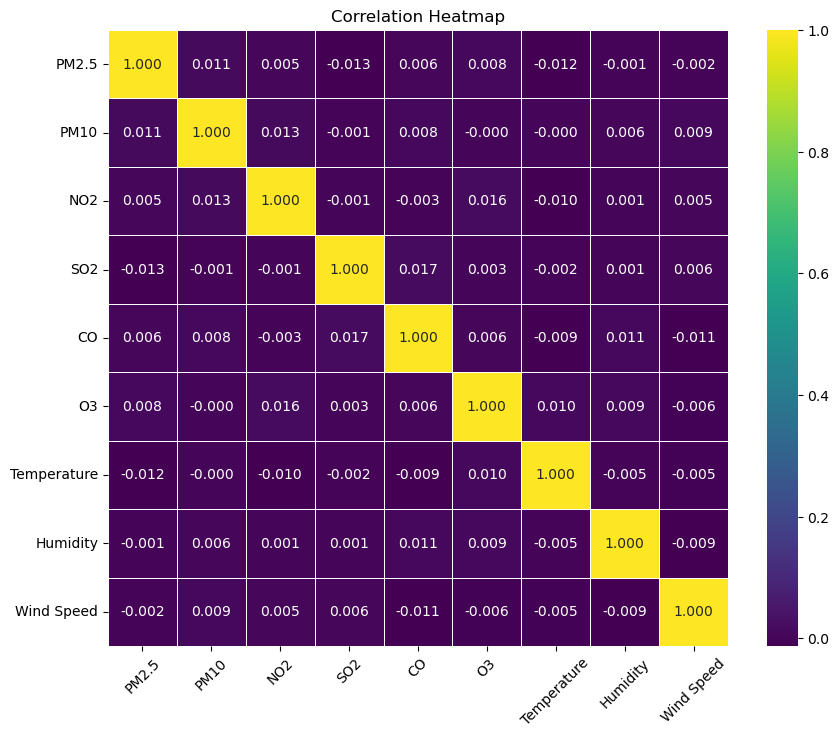

In [57]:
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.3f', linewidths=0.5)
plt.xticks(rotation=45)

plt.title('Correlation Heatmap')
plt.show()

**COMMENT**
---

1. Data Structure and Geographic Distribution:
- The dataset has excellent global coverage, spanning 20 major cities across 19 countries
- There's a relatively balanced distribution of data across cities (around 4.6-5.4% per city)
- The USA has the largest representation in the country-wise distribution (due to having 2 cities New York and Los Angeles), followed by India and South Korea
- The geographic diversity ensures a good representation of different climate zones and urban environments

2. Air Quality Parameters:
- The box plots reveal several important patterns:
    - PM10 shows the highest median and variability among pollutants
    - O3 (Ozone) exhibits large variability with many outliers
    - CO shows the most compact distribution, suggesting stable measurements
    - PM2.5 and PM10 show significant outliers above their upper quartiles, indicating pollution episodes
- The correlation heatmap reveals:
    - Surprisingly weak correlations between most parameters (most values near 0)
    - No strong multicollinearity between pollutants
    - Temperature, humidity, and wind speed show minimal correlation with pollutants
    - Even PM2.5 and PM10, which typically correlate strongly, show unexpectedly low correlation (0.011)

3. Quality of Analysis:
- The visualizations are well-chosen and complementary:
    - Box plots effectively show distributions and outliers
    - Pie charts clearly display the balanced sampling across cities/countries
    - The correlation heatmap provides a clear view of parameter relationships
- The data appears to be well-preprocessed with no missing values evident

4. Insight:
- The similar percentages across cities (all around 5%) suggests intentional balanced sampling
- The presence of major cities from both developed and developing nations allows for meaningful comparisons
- The low correlations between parameters suggest that local factors might be more important than general atmospheric conditions